In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

LOAD DATA

In [6]:
df = pd.read_csv('1.01. Simple linear regression.csv')
df.head(3)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54


DATA WRANGLING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [18]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [11]:
df.shape

(84, 2)

DATA EXPLANORY

y = df['GPA']
x1 = df[['SAT']]

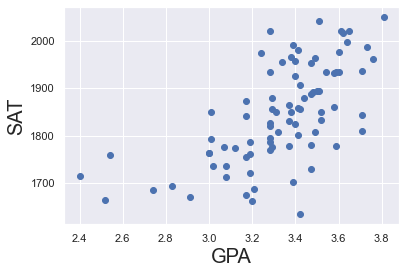

In [13]:
plt.scatter(y,x1)
plt.xlabel('GPA', fontsize=20)
plt.ylabel('SAT', fontsize=20)
plt.show()

In [14]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           7.20e-11
Time:                        15:17:36   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
new_data = pd.DataFrame({'conts':1, 'SAT': [1900,1987,1690]})
new_data 

,conts,SAT
0,1,1900
1,1,1987
2,1,1690


In [16]:
predictions = results.predict(new_data)
predictionspredictions = results.predict(new_data)
predictions

0    3.420848
1    3.564892
2    3.073153
dtype: float64

In [17]:
pred_df = pd.DataFrame({'predictions': predictions})
joined = new_data.join(pred_df)
joined

,conts,SAT,predictions
0,1,1900,3.420848
1,1,1987,3.564892
2,1,1690,3.073153
